In [6]:
import csv
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
panda_data_df = pd.read_csv("US_Accidents_May19.csv")
panda_data_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
print(panda_data_df.shape)
print(panda_data_df.columns)

(2243939, 49)
Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [9]:
weather_state_co = panda_data_df[['Severity','Description', 'City','State', 'Timezone', 'Airport_Code', 'Weather_Condition']]
weather_state_co.head(10)

,Severity,Description,City,State,Timezone,Airport_Code,Weather_Condition
0,3,Right lane blocked due to accident on I-70 Eas...,Dayton,OH,US/Eastern,KFFO,Light Rain
1,2,Accident on Brice Rd at Tussing Rd. Expect del...,Reynoldsburg,OH,US/Eastern,KCMH,Light Rain
2,2,Accident on OH-32 State Route 32 Westbound at ...,Williamsburg,OH,US/Eastern,KI69,Overcast
3,3,Accident on I-75 Southbound at Exits 52 52B US...,Dayton,OH,US/Eastern,KDAY,Mostly Cloudy
4,2,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Dayton,OH,US/Eastern,KMGY,Mostly Cloudy
5,3,Accident on I-270 Outerbelt Northbound near Ex...,Westerville,OH,US/Eastern,KCMH,Light Rain
6,2,Accident on Oakridge Dr at Woodward Ave. Expec...,Dayton,OH,US/Eastern,KDAY,Overcast
7,3,Accident on I-75 Southbound at Exit 54B Grand ...,Dayton,OH,US/Eastern,KDAY,Overcast
8,2,Accident on Notre Dame Ave at Warner Ave. Expe...,Dayton,OH,US/Eastern,KFFO,Mostly Cloudy
9,3,Right hand shoulder blocked due to accident on...,Westerville,OH,US/Eastern,KCMH,Light Rain


In [13]:
# weather_conditions_df = weather_state_co.groupby(['State','Weather_Condition']).count()
# weather_conditions_df
# final_df = pd.DataFrame({"Number of Accidents by State": weather_conditions_df})
# final_df.head()


In [27]:
#maybe use this code to count by state that look better
count_by_state = weather_state_co.groupby('Weather_Condition')['State'].count()
final2_df = pd.DataFrame({'Number of Accidents ':count_by_state})
final2_df.head(60)
high_value_df = final2_df.drop(['Blowing Sand','Dust Whirls','Funnel Cloud', 'Hail', 'Heavy Blowing Snow', 'Heavy Freezing Drizzle', 'Heavy Freezing Rain','Heavy Ice Pellets','Heavy Rain Showers', 'Heavy Smoke', 'Heavy Thunderstorms and Snow', 'Heavy Thunderstorms with Small Hail', 'Light Blowing Snow', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Snow Grains', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms and Snow', 'Low Drifting Snow', 'Sand', 'Small Hail', 'Snow Grains', 'Snow Showers', 'Squalls', 'Thunderstorms and Snow', 'Volcanic Ash', 'Blowing Snow', 'Heavy Drizzle', 'Ice Pellets', 'Light Ice Pellets', 'Light Rain Showers', 'Rain Showers', 'Widespread Dust', 'Drizzle','Heavy Snow', 'Light Freezing Drizzle', 'Light Freezing Fog', 'Mist', 'Heavy Thunderstorms and Rain', 'Light Freezing Rain', 'Light Thunderstorms and Rain', 'Smoke', 'Shallow Fog', 'Patches of Fog', 'Thunderstorms and Rain', 'Snow','Thunderstorm'])
high_value_df.shape
high_value_df.head(60)

,Number of Accidents
Weather_Condition,
Clear,808182
Fog,11617
Haze,27727
Heavy Rain,8929
Light Drizzle,8058
Light Rain,107164
Light Snow,36038
Mostly Cloudy,310086
Overcast,382482


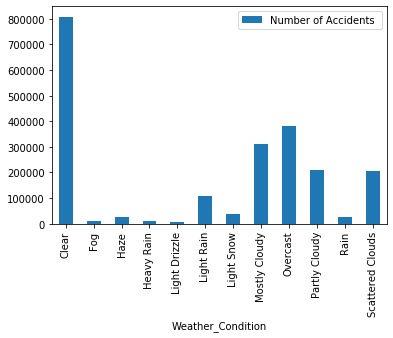

In [28]:
highvalue_chart = high_value_df.plot(kind='bar')

In [29]:
# Severity and count of acccidents
Severity_by_state = weather_state_co.groupby('Severity')['State'].count()
Severity_by_state
final_sev_df = pd.DataFrame({'Number of Accidents': Severity_by_state})
final_sev_df


,Number of Accidents
Severity,
0,17
1,814
2,1455524
3,715582
4,72002


In [10]:
av_severity = weather_state_co.groupby('State')['Severity'].mean()
av_severity
state_severity = pd.DataFrame({'Severity Average by State': av_severity})
state_severity

,Severity Average by State
State,
AL,2.415175
AR,2.884200
AZ,2.316878
CA,2.393750
CO,2.511629
CT,2.605784
DC,2.494527
DE,2.410371
FL,2.382129


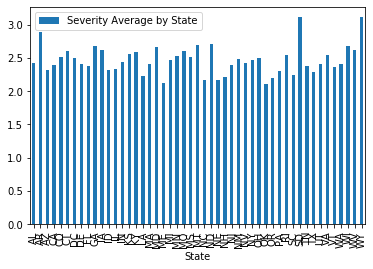

In [12]:
state_sev_chart = state_severity.plot(kind='bar')